In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import *


load data

In [33]:
data = pd.read_csv('updated_dataset.csv')
data.head()
data.info()

# Y = data["price"]
# data = data.drop(["price"], axis = 1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area        429 non-null    float64
 1   bedroom     429 non-null    float64
 2   price       429 non-null    float64
 3   floor       334 non-null    float64
 4   road-width  202 non-null    float64
 5   parking     429 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 20.2 KB


In [34]:
data.columns

Index(['area', 'bedroom', 'price', 'floor', 'road-width', 'parking'], dtype='object')

In [35]:
print(data.describe())

             area     bedroom       price       floor  road-width     parking
count  429.000000  429.000000  429.000000  334.000000  202.000000  429.000000
mean    78.981352    2.363636    2.601026   11.449102   15.113861    0.393939
std     20.861014    0.570442    0.861373   10.578554   13.155382    0.489192
min     30.000000    1.000000    0.220000    1.000000    0.000000    0.000000
25%     65.000000    2.000000    2.000000    1.000000    5.000000    0.000000
50%     76.000000    2.000000    2.600000    9.000000   10.000000    0.000000
75%     90.000000    3.000000    3.100000   18.000000   20.000000    1.000000
max    190.000000    4.000000    5.500000   45.000000   80.000000    1.000000


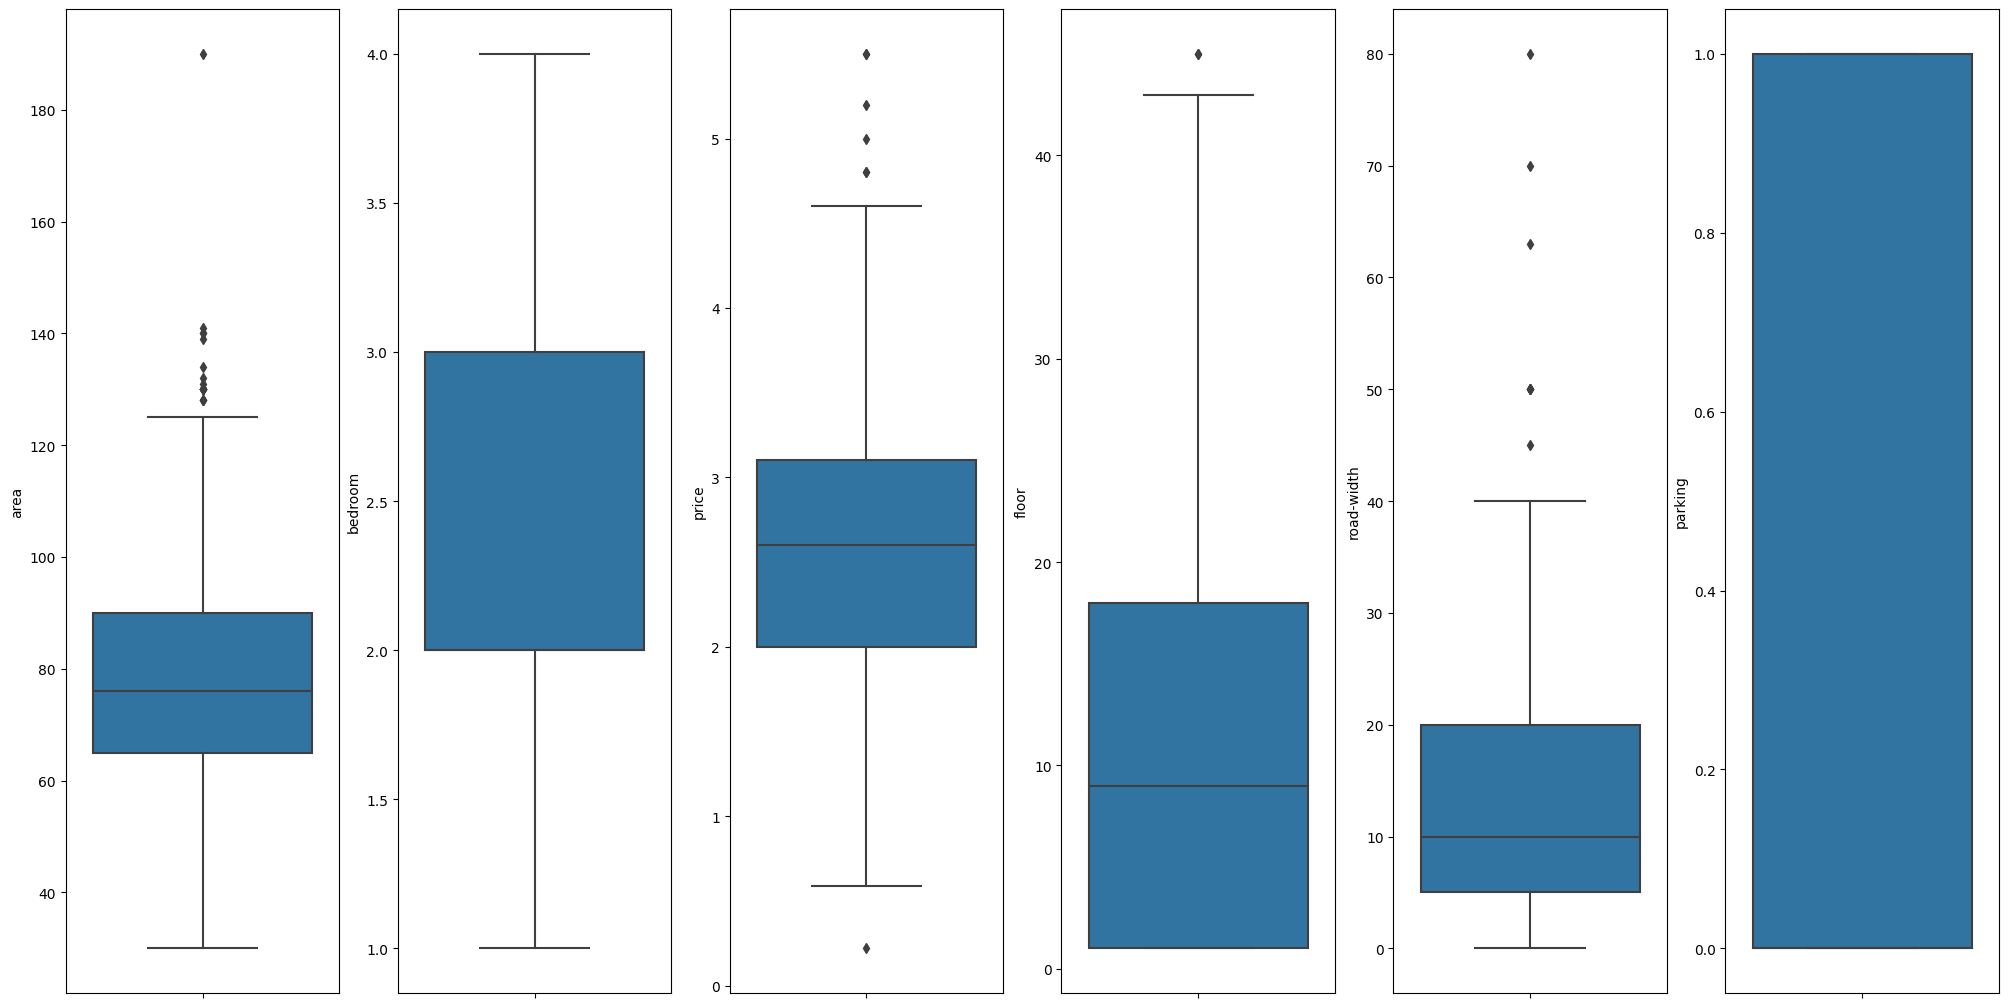

In [37]:
fig, axs = plt.subplots(ncols=6, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [38]:
for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column area outliers = 4.43%
Column bedroom outliers = 0.00%
Column price outliers = 1.63%
Column floor outliers = 0.47%
Column road-width outliers = 1.86%
Column parking outliers = 0.00%


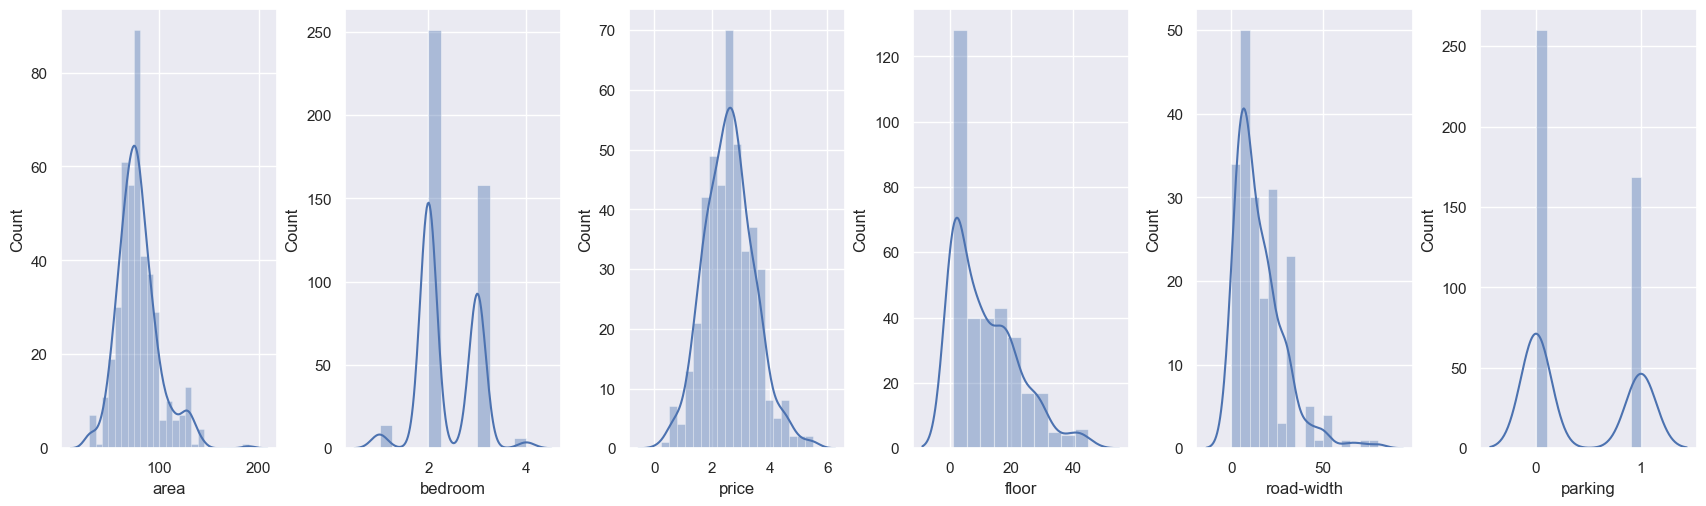

In [60]:
sns.set_theme()

fig, axs = plt.subplots(ncols=6, nrows=1, figsize=(17, 5))
index = 0
axs = axs.flatten()
for k,v in data.items():
    #sns.distplot(v, ax=axs[index])
    sns.histplot(v, ax=axs[index], kde=True, kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4))
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

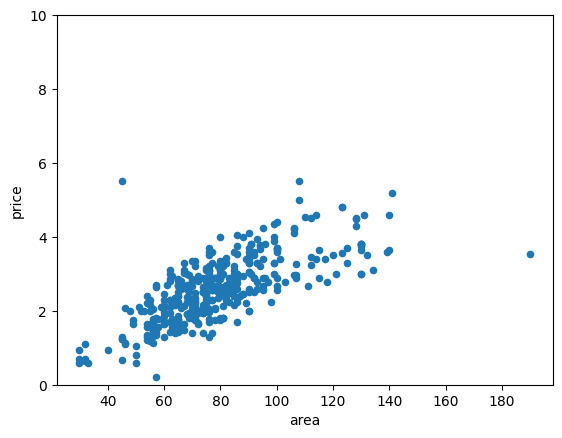

In [17]:
#scatter plot area/price
var = 'area'
data = pd.concat([data['price'], data[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(0,10));

It seems that 'price' and 'area' have a linear relationship.

<AxesSubplot:>

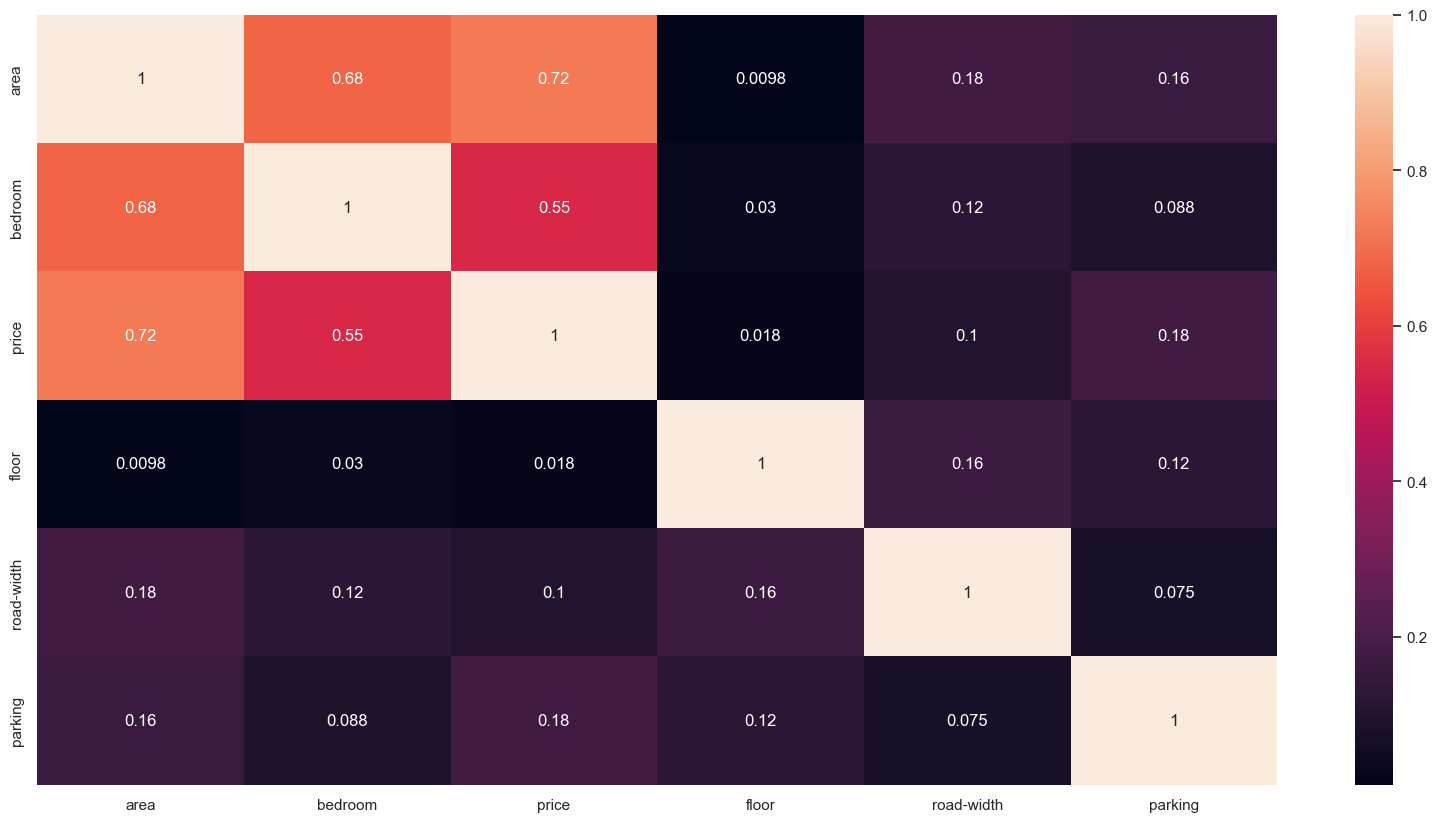

In [46]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

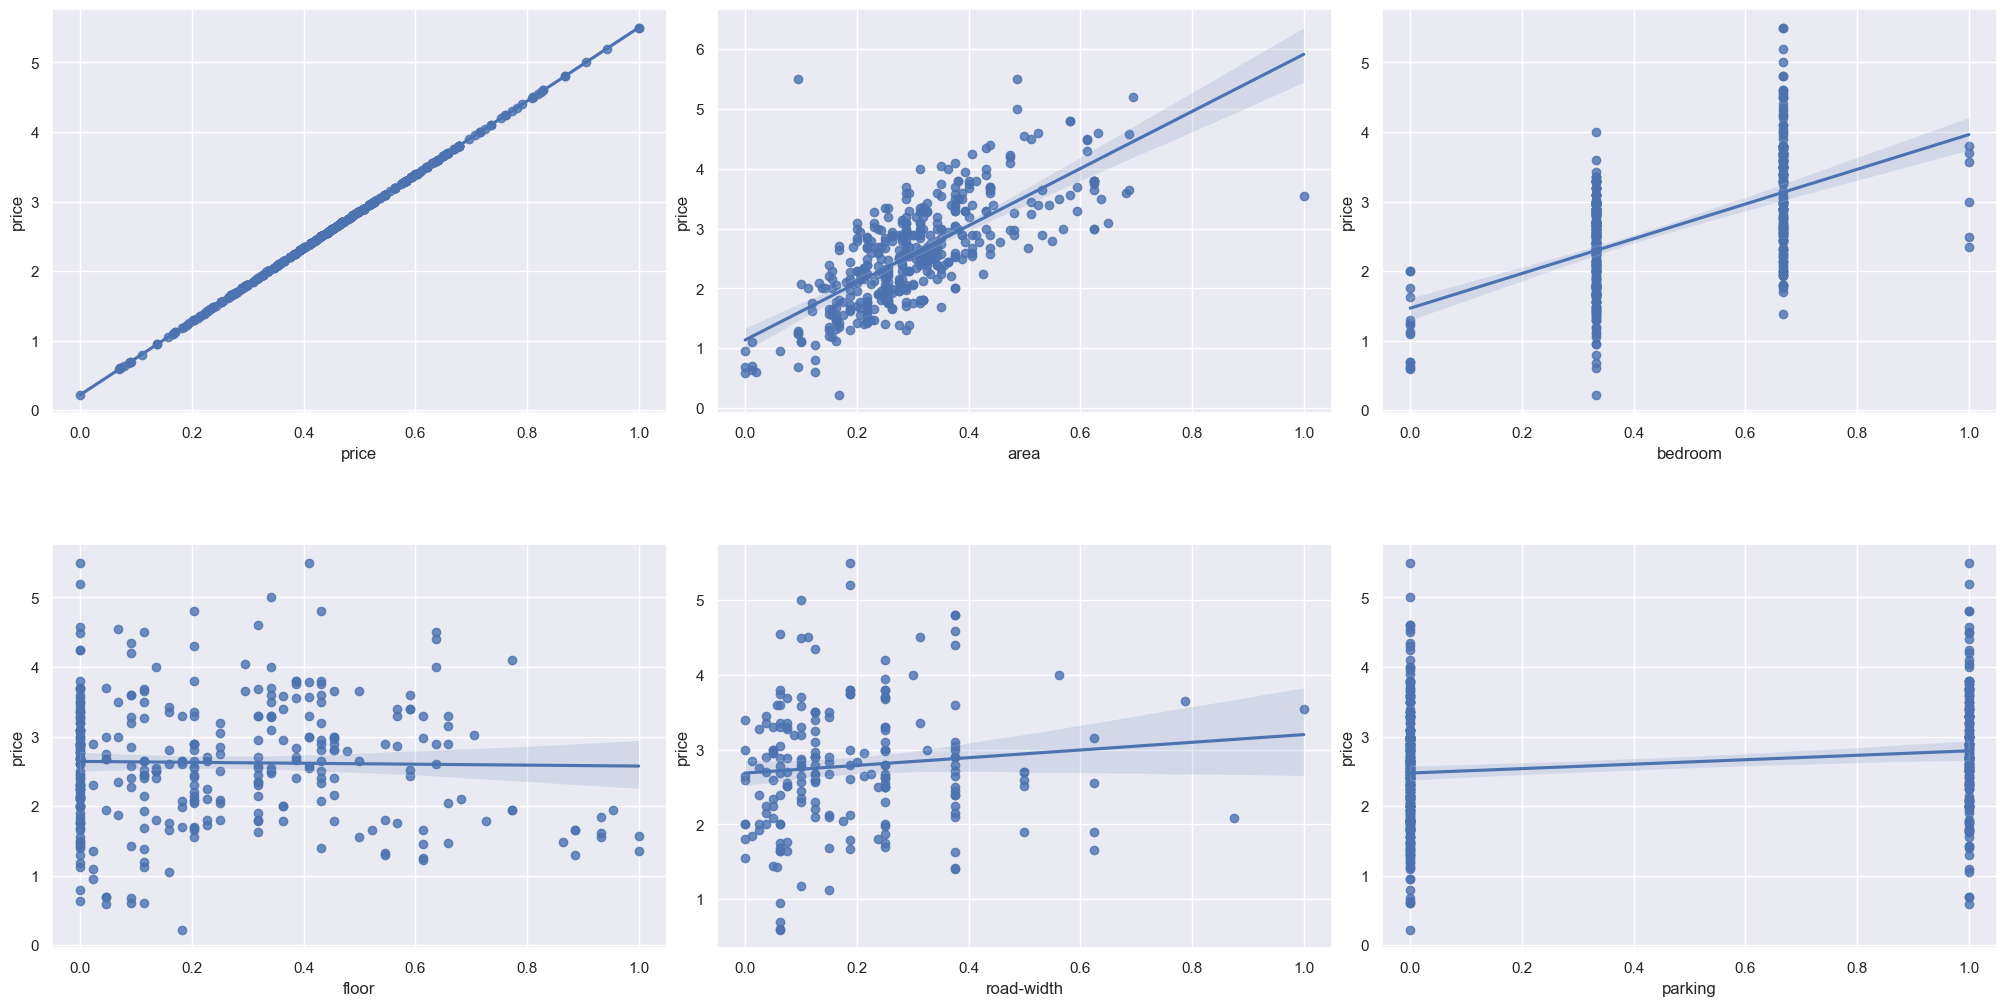

In [61]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['price','area','bedroom','floor','road-width','parking']
x = data.loc[:,column_sels]
y = data['price']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)